# Data RS Aletsch

In [123]:
from obspy import read, UTCDateTime
from obspy.io.xseed import Parser
from obspy import read_inventory
from obspy.signal import PPSD
import matplotlib.pylab as plt

In [124]:
st = read("CATZ.mseed")
print(st)

1 Trace(s) in Stream:
AM.RE682.00.SHZ | 2018-03-01T00:00:02.466999Z - 2018-03-02T00:00:08.786999Z | 50.0 Hz, 4320317 samples


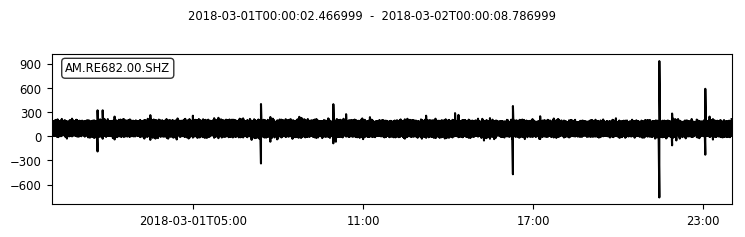

In [125]:
st.plot()

In [126]:
len(st)
tr=st[0] #assign fisrt and only trace to new variable
print(tr)

AM.RE682.00.SHZ | 2018-03-01T00:00:02.466999Z - 2018-03-02T00:00:08.786999Z | 50.0 Hz, 4320317 samples


In [80]:
print(tr.stats)

         network: AM
         station: RE682
        location: 00
         channel: SHZ
       starttime: 2018-03-01T00:00:02.466999Z
         endtime: 2018-03-02T00:00:08.786999Z
   sampling_rate: 50.0
           delta: 0.02
            npts: 4320317
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 6790, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 3476480})


In [135]:
parser = Parser("out4.response.restored-plus-decimation.dataless")
ppsd = PPSD(tr.stats, metadata=parser)

In [136]:
ppsd.add(st)

/Users/veliooo/anaconda3/lib/python3.6/site-packages/obspy/signal/spectral_estimation.py:811: UserWarning: Error getting response from provided metadata:
ValueError: Response for AM.RE682.00.SHZ not found in Parser
Skipping time segment(s).
  warnings.warn(msg)


False

In [139]:
paz = {'gain': 1.0,
       'poles': [-4.21+0j, -2.33+0j, -1.29+0j],
       'sensitivity': 469000000.0,
       'zeros': [-6.75214+0j,0,0,0]}

In [140]:
ppsd = PPSD(tr.stats, paz)

In [141]:
print(ppsd.id)
print(ppsd.times_processed)

AM.RE682.00.SHZ
[]


In [142]:
ppsd.add(st)

True

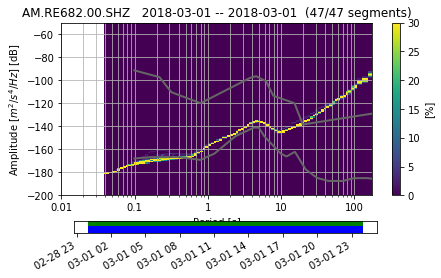

In [143]:
ppsd.plot()

In [110]:
ppsd.plot("CATZ_v3.png") 